# TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description

The TMDB 5000 Movie Dataset is a collection of movie data sourced from The Movie Database (TMDB), a popular, user-editable database for movies and TV shows. 
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- This dataset was generated from The Movie Database API and fetched from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

- The purpose of this dataset is to provide a large and varied sample of movie data for analysis and research.

### Questions for Analysis
1. **What can we say about the success of a movie before it is released?**
2. **Does budget influence movie's potential earnings?**
3. **Is there a relationship between the movie’s budget and its critical reception?**
4. **Is there a relationship between the movie’s budget or revenue or profit?**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

In [4]:
# Fetch the datasets
movies_dataset_path = os.path.join(os.getcwd(), 'dataset', 'tmdb_5000_movies.csv')
df_movies = pd.read_csv(movies_dataset_path)

credit_dataset_path = os.path.join(os.getcwd(), 'dataset', 'tmdb_5000_credits.csv')
df_credits = pd.read_csv(credit_dataset_path)

In [5]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
# Merge the movies and credits dataset
df = pd.merge(left = df_movies, right = df_credits, on='title')

Check for description of dataset, datatypes, range of data in each column, null count.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [9]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [10]:
df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
movie_id                4803
cast                    4761
crew                    4776
dtype: int64

In [11]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

In [12]:
df.shape

(4809, 23)

In [13]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               


### Data Cleaning

In [15]:
# Check Duplicates
df.duplicated().sum()

0

No duplicate values found in the dataset, no need to clean for duplicate data.

#### Check Null / Missing values


In [16]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

Null values found in columns - homepage, tagline, overview, release_date, runtime.

Drop the homepage and tagline columns as they have more than 20% of null values.

In [17]:
df.drop(['homepage', 'tagline'], axis=1, inplace=True)

In [18]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

Now, we need to fill the null values for the rest of the columns.

We fill the runtime column with mean values from the column.

In [19]:
mean_runtime = df['runtime'].mean()
df['runtime'].fillna(mean_runtime, inplace=True)

In [20]:
df['overview'].head(n=1)[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

Checking the data in the overview column concludes that the data cannot be used for filling in the null value. 

So we add emtpy string inplace of the null value

In [21]:
df['overview'].fillna('', inplace=True)

Movie release date is filled with the mode value from the column.

In [22]:
mode_release_date = df['release_date'].mode()[0]
df['release_date'].fillna(mode_release_date, inplace=True)

In [23]:
df.isnull().sum().sum()

0

No null values remaining, the dataset is cleaned of the null values.

#### Drop Columns

Dropping the columns which are not required. **id, original_title, movie_id**.

In [24]:
df.drop(['id', 'original_title', 'movie_id'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   keywords              4809 non-null   object 
 3   original_language     4809 non-null   object 
 4   overview              4809 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_companies  4809 non-null   object 
 7   production_countries  4809 non-null   object 
 8   release_date          4809 non-null   object 
 9   revenue               4809 non-null   int64  
 10  runtime               4809 non-null   float64
 11  spoken_languages      4809 non-null   object 
 12  status                4809 non-null   object 
 13  title                 4809 non-null   object 
 14  vote_average          4809 non-null   float64
 15  vote_count           

#### Querying Data

In [26]:
# Checking how many movies have 0 budget
df.query('budget == 0').shape

(1039, 18)

In [27]:
# Checking how many movies have 0 revenue
df.query('revenue == 0').shape

(1430, 18)

In [28]:
# Checking how many movies have 0 budget and revenue
df.query('budget == 0 and revenue == 0').shape

(892, 18)

In [29]:
# Checking how many movies have 0 runtime
df.query('runtime == 0').shape

(35, 18)

In [30]:
# Checking the types of status of movies in the dataset
df['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [31]:
# Querying how many movies have released status
df.query('status == "Released"').shape

(4801, 18)

#### Fixing Dataset

1. Fixing Datatypes and Optimization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   keywords              4809 non-null   object 
 3   original_language     4809 non-null   object 
 4   overview              4809 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_companies  4809 non-null   object 
 7   production_countries  4809 non-null   object 
 8   release_date          4809 non-null   object 
 9   revenue               4809 non-null   int64  
 10  runtime               4809 non-null   float64
 11  spoken_languages      4809 non-null   object 
 12  status                4809 non-null   object 
 13  title                 4809 non-null   object 
 14  vote_average          4809 non-null   float64
 15  vote_count           

Currently the dataset occupies, 676.4+ KB of data. We can optimize this by changing the datatypes of certain columns.

The release_date column needs to be a datetime data type.

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4809 non-null   int64         
 1   genres                4809 non-null   object        
 2   keywords              4809 non-null   object        
 3   original_language     4809 non-null   object        
 4   overview              4809 non-null   object        
 5   popularity            4809 non-null   float64       
 6   production_companies  4809 non-null   object        
 7   production_countries  4809 non-null   object        
 8   release_date          4809 non-null   datetime64[ns]
 9   revenue               4809 non-null   int64         
 10  runtime               4809 non-null   float64       
 11  spoken_languages      4809 non-null   object        
 12  status                4809 non-null   object        
 13  title             

In [34]:
df.runtime.describe()

count    4809.000000
mean      106.882255
std        22.597834
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [35]:
df.vote_count.describe()

count     4809.000000
mean       690.331670
std       1234.187111
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

vote_count can be represented as int16.

In [36]:
df['vote_count'] = df['vote_count'].astype('int16')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4809 non-null   int64         
 1   genres                4809 non-null   object        
 2   keywords              4809 non-null   object        
 3   original_language     4809 non-null   object        
 4   overview              4809 non-null   object        
 5   popularity            4809 non-null   float64       
 6   production_companies  4809 non-null   object        
 7   production_countries  4809 non-null   object        
 8   release_date          4809 non-null   datetime64[ns]
 9   revenue               4809 non-null   int64         
 10  runtime               4809 non-null   float64       
 11  spoken_languages      4809 non-null   object        
 12  status                4809 non-null   object        
 13  title             

Slight improvement - 620+ KB

In [38]:
df.vote_average.describe()

count    4809.000000
mean        6.092514
std         1.193989
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

Similarly, vote_average can be represented as float16

In [39]:
df['vote_average'] = df['vote_average'].astype('float16')

In [40]:
df.popularity.describe()

count    4809.000000
mean       21.491664
std        31.803366
min         0.000000
25%         4.667230
50%        12.921594
75%        28.350529
max       875.581305
Name: popularity, dtype: float64

In [41]:
df.original_language.describe()

count     4809
unique      37
top         en
freq      4510
Name: original_language, dtype: object

In [42]:
df.production_companies.describe()

count     4809
unique    3697
top         []
freq       352
Name: production_companies, dtype: object

In [43]:
df.production_countries.describe()

count                                                  4809
unique                                                  469
top       [{"iso_3166_1": "US", "name": "United States o...
freq                                                   2979
Name: production_countries, dtype: object

In [44]:
df.status.describe()

count         4809
unique           3
top       Released
freq          4801
Name: status, dtype: object

Changing status and original_language columns to category.

In [45]:
df['status'] = df['status'].astype('category')
df['original_language'] = df['original_language'].astype('category')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4809 non-null   int64         
 1   genres                4809 non-null   object        
 2   keywords              4809 non-null   object        
 3   original_language     4809 non-null   category      
 4   overview              4809 non-null   object        
 5   popularity            4809 non-null   float64       
 6   production_companies  4809 non-null   object        
 7   production_countries  4809 non-null   object        
 8   release_date          4809 non-null   datetime64[ns]
 9   revenue               4809 non-null   int64         
 10  runtime               4809 non-null   float64       
 11  spoken_languages      4809 non-null   object        
 12  status                4809 non-null   category      
 13  title             

Optimised to 555.8+ KB

2. Fixing Columns

If we take a look at **genres, keywords, production_companies, production_countries, spoken_languages, cast and crew** we see that the data is being stored in dictionary format.

We need to change those to a more conventional form (into a list of data).

In [47]:
import ast

def convert(obj):
    converted_list = []
    for i in ast.literal_eval(obj):
        converted_list.append(i['name'])

    return converted_list

In [48]:
df.genres.apply(convert).head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [49]:
df.keywords.apply(convert).head()

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
Name: keywords, dtype: object

In [50]:
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)

In [51]:
df['production_companies'] = df.production_companies.apply(convert)
df.production_companies.head()[0]

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

In [52]:
df['production_countries'] = df.production_countries.apply(convert)
df.production_countries.head()[0]

['United States of America', 'United Kingdom']

In [53]:
df['spoken_languages'] = df.spoken_languages.apply(convert)

In [54]:
def convert_cast(obj):
    cast = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 5:
            cast.append(i['name'])
            counter += 1
        else:
            break

    return cast

In [55]:
df.cast.apply(convert_cast).head()[0]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [56]:
df['cast'] = df['cast'].apply(convert_cast)

Adding a new column - Director, to have the data regarding director of the movie.

In [57]:
def get_director(obj):
    director = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            director.append(i['name'])
            break
    
    return director

In [58]:
df['Director'] = df['crew'].apply(get_director)

In [59]:
df['crew'].head()[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

Formatting the data further, to remove spaces and splitting the data in case of keywords.

In [60]:
df['overview'] = df['overview'].apply(lambda x:x.split())

df['genres'] = df['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
df['Director'] = df['Director'].apply(lambda x:[i.replace(" ", "") for i in x])


Dropping crew column as it is no longer required.

In [61]:
df.drop(['crew'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4809 non-null   int64         
 1   genres                4809 non-null   object        
 2   keywords              4809 non-null   object        
 3   original_language     4809 non-null   category      
 4   overview              4809 non-null   object        
 5   popularity            4809 non-null   float64       
 6   production_companies  4809 non-null   object        
 7   production_countries  4809 non-null   object        
 8   release_date          4809 non-null   datetime64[ns]
 9   revenue               4809 non-null   int64         
 10  runtime               4809 non-null   float64       
 11  spoken_languages      4809 non-null   object        
 12  status                4809 non-null   category      
 13  title             

Now, the dataset is clean and can be saved.

In [63]:
df.to_csv('dataset/cleaned_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


In [64]:
df = pd.read_csv('dataset/cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   keywords              4809 non-null   object 
 3   original_language     4809 non-null   object 
 4   overview              4809 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_companies  4809 non-null   object 
 7   production_countries  4809 non-null   object 
 8   release_date          4809 non-null   object 
 9   revenue               4809 non-null   int64  
 10  runtime               4809 non-null   float64
 11  spoken_languages      4809 non-null   object 
 12  status                4809 non-null   object 
 13  title                 4809 non-null   object 
 14  vote_average          4809 non-null   float64
 15  vote_count           

In [65]:
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
numeric_columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [66]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['genres', 'keywords', 'original_language', 'overview',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'title', 'cast', 'Director'],
      dtype='object')

In [67]:
df.groupby('title')[numeric_columns].quantile(q=[0.5, 0.9, 0.95]).head(20).sort_values(by='popularity', ascending=False)

budget  popularity      revenue  runtime  \
title                                                                           
10 Things I Hate About You 0.95  16000000.0   54.550275   53478166.0     97.0   
                           0.50  16000000.0   54.550275   53478166.0     97.0   
                           0.90  16000000.0   54.550275   53478166.0     97.0   
10 Cloverfield Lane        0.50  15000000.0   53.698683  108286421.0    103.0   
                           0.90  15000000.0   53.698683  108286421.0    103.0   
                           0.95  15000000.0   53.698683  108286421.0    103.0   
(500) Days of Summer       0.50   7500000.0   45.610993   60722734.0     95.0   
                           0.90   7500000.0   45.610993   60722734.0     95.0   
                           0.95   7500000.0   45.610993   60722734.0     95.0   
102 Dalmatians             0.95  85000000.0    9.895061  183611771.0    100.0   
                           0.90  85000000.0    9.895061  183611771.0    100.0   
                           0.50  85000000.0    9.895061  183611771.0    100.0   
10th & Wolf                0.90   8000000.0    3.942464     143451.0    107.0   
                           0.50   8000000.0    3.942464     143451.0    107.0   
#Horror                    0.50   1500000.0    2.815228          0.0     90.0   
                           0.90   1500000.0    2.815228          0.0     90.0   
                           0.95   1500000.0    2.815228          0.0     90.0   
10 Days in a Madhouse      0.95   1200000.0    0.489271          0.0    111.0   
                           0.50   1200000.0    0.489271          0.0    111.0   
                           0.90   1200000.0    0.489271          0.0    111.0   

                                 vote_average  vote_count  
title                                                      
10 Things I Hate About You 0.95           7.3      1701.0  
                           0.50           7.3      1701.0  
                           0.90           7.3      1701.0  
10 Cloverfield Lane        0.50           6.8      2468.0  
                           0.90           6.8      2468.0  
                           0.95           6.8      2468.0  
(500) Days of Summer       0.50           7.2      2904.0  
                           0.90           7.2      2904.0  
                           0.95           7.2      2904.0  
102 Dalmatians             0.95           5.1       313.0  
                           0.90           5.1       313.0  
                           0.50           5.1       313.0  
10th & Wolf                0.90           6.3        24.0  
                           0.50           6.3        24.0  
#Horror                    0.50           3.3        52.0  
                           0.90           3.3        52.0  
                           0.95           3.3        52.0  
10 Days in a Madhouse      0.95           4.3         5.0  
                           0.50           4.3         5.0  
                           0.90           4.3         5.0

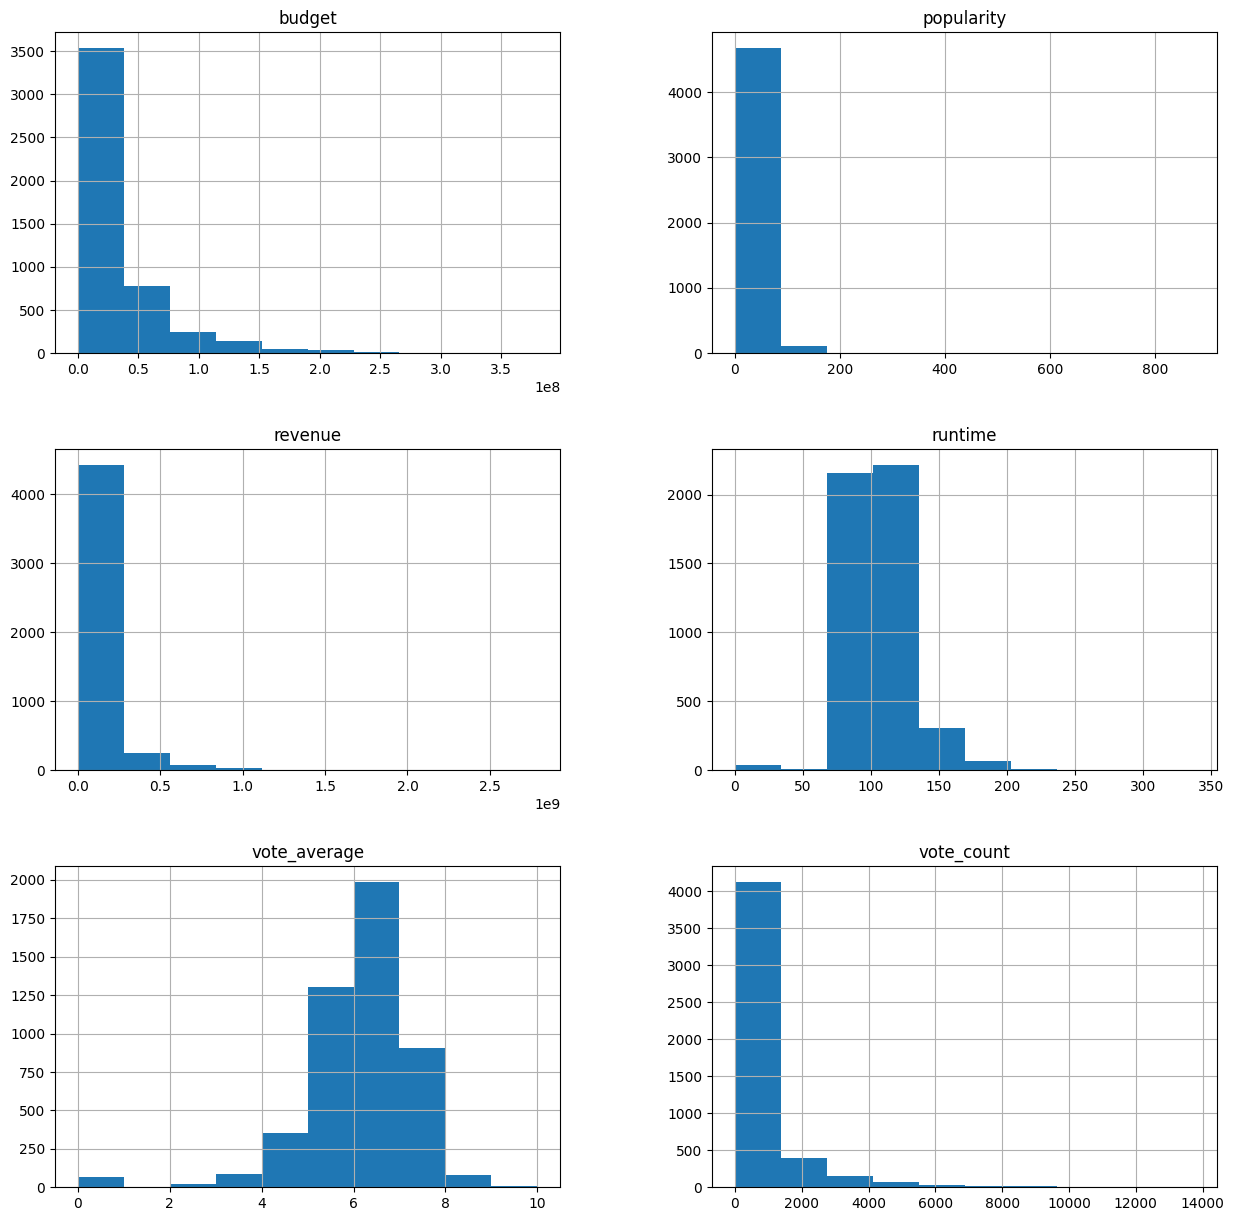

In [68]:
df.hist(figsize=(15, 15));

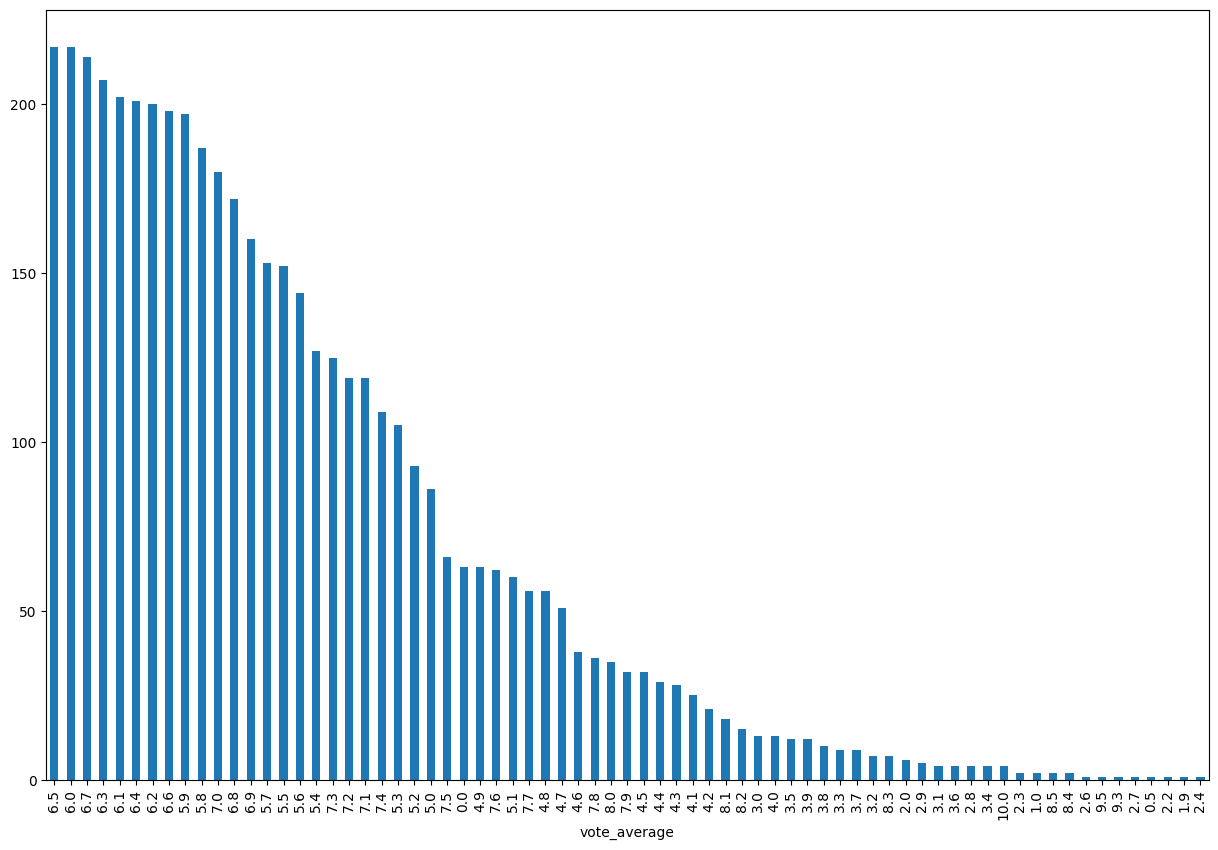

In [69]:
df.vote_average.value_counts().plot(kind='bar', figsize=(15, 10));

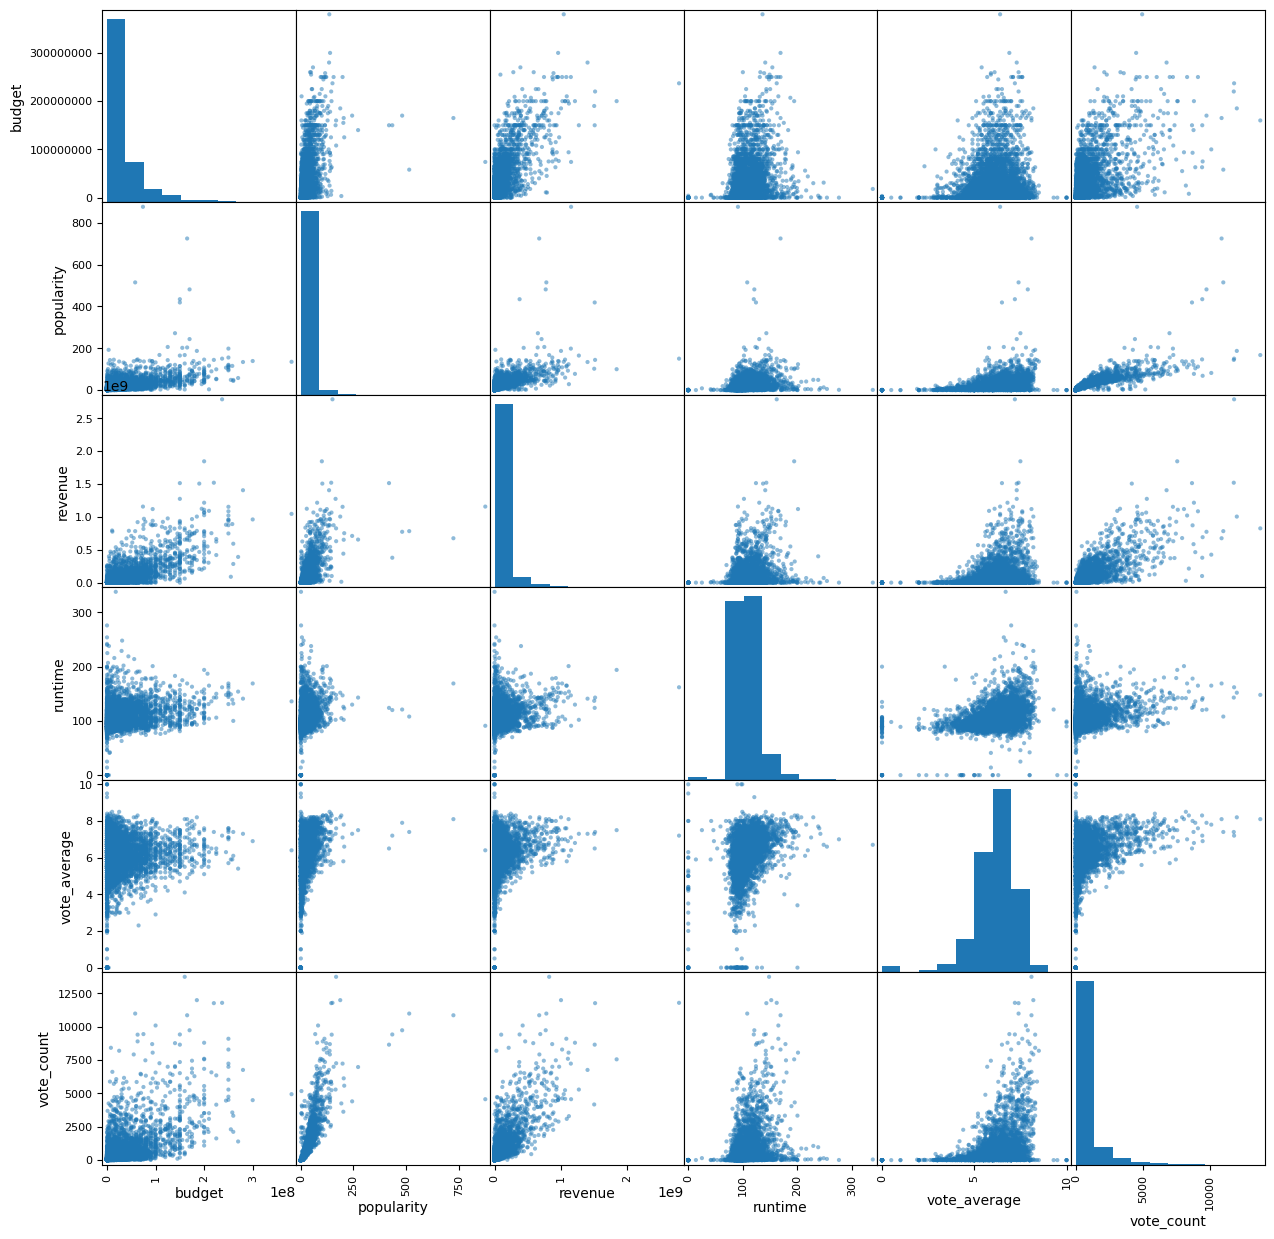

In [70]:
pd.plotting.scatter_matrix(df[numeric_columns], figsize=(15, 15));

### Research Question 1 - What can we say about the success of a movie before it is released?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   keywords              4809 non-null   object 
 3   original_language     4809 non-null   object 
 4   overview              4809 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_companies  4809 non-null   object 
 7   production_countries  4809 non-null   object 
 8   release_date          4809 non-null   object 
 9   revenue               4809 non-null   int64  
 10  runtime               4809 non-null   float64
 11  spoken_languages      4809 non-null   object 
 12  status                4809 non-null   object 
 13  title                 4809 non-null   object 
 14  vote_average          4809 non-null   float64
 15  vote_count           

Creating new column profit (revenue - budget).

In [72]:
df['profit'] = df['revenue'] - df['budget']

1. Checking if directors have any impact over the movie.
We take into account the director, voting average, voting count, profit, popularity of the movie and the budget of the movie for finding out if a director has much impact over the success of the film. 

In [73]:
directors = df.groupby('Director').agg({'vote_average': 'mean', 'vote_count': 'sum', 'profit': 'sum', 'popularity': 'mean', 'budget' : 'sum', 'Director' : 'count'}).rename(columns={'Director': 'movie_count'})
directors = directors[directors['movie_count'] > 5]
directors.sort_values(by='vote_average', ascending=False).head(10)

,vote_average,vote_count,profit,popularity,budget,movie_count
Director,,,,,,
['ChristopherNolan'],7.800000,62653,3222483234,185.373245,1005000000,8
['QuentinTarantino'],7.775000,43339,1206430797,72.854107,295200000,8
['StanleyKubrick'],7.683333,10331,204198854,48.045619,109300000,6
['WesAnderson'],7.414286,10375,240240282,33.731284,173000000,7
['DavidFincher'],7.340000,36586,1489346325,76.037266,650000000,10
['PeterJackson'],7.333333,45533,5205642820,88.001930,1293000000,9
['JamesCameron'],7.328571,32819,5136669439,79.684543,746900000,7
['MartinScorsese'],7.295000,32866,1054035998,34.015754,902600000,20
['AlejandroGonzálezIñárritu'],7.233333,13716,677979871,47.614783,200000000,6


In [74]:
directors.sort_values(by=['profit', 'vote_average'], ascending=[False, False])[:5]

,vote_average,vote_count,profit,popularity,budget,movie_count
Director,,,,,,
['StevenSpielberg'],6.974074,59771,7479893164,48.498396,1667500000,27
['PeterJackson'],7.333333,45533,5205642820,88.001930,1293000000,9
['JamesCameron'],7.328571,32819,5136669439,79.684543,746900000,7
['MichaelBay'],6.400000,26845,4422524638,43.415186,1410000000,12
['ChristopherNolan'],7.800000,62653,3222483234,185.373245,1005000000,8


1. We can deduce from the above info that Steven Spielberg, Peter Jackson, James Cameron, Michael Bay and Christopher Nolan have directed movies which have the most positive ratings and the most profits. 

    So, if a film is being directed by any one of these director's it will surely be a successful movie.

In [75]:
genre_director = df.groupby('genres').agg({'vote_average': 'mean', 'vote_count': 'sum', 'profit': 'sum', 'popularity': 'mean', 'budget' : 'mean', 'genres' : 'count'}).rename(columns={'genres': 'movie_count'})
genre_director.sort_values(by=['popularity', 'profit', 'vote_average'], ascending=False)[:10]

,vote_average,vote_count,profit,popularity,budget,movie_count
genres,,,,,,
"['Family', 'Animation', 'Adventure', 'Comedy']",6.325,7877,1509017032,257.205060,104000000.0,4
"['ScienceFiction', 'Adventure', 'Thriller']",6.600,5584,627100229,206.227151,125000000.0,1
"['Adventure', 'Family', 'Animation', 'Action', 'Comedy']",7.800,6135,487105443,203.734590,165000000.0,1
"['ScienceFiction', 'Action', 'Thriller', 'Adventure']",5.800,3631,285603537,202.042635,155000000.0,1
"['Adventure', 'Drama', 'ScienceFiction']",6.850,11895,520532299,194.354812,47250000.0,4
"['Drama', 'Action', 'Crime', 'Thriller']",8.200,12002,819558444,187.322927,185000000.0,1
"['Drama', 'Adventure', 'ScienceFiction']",7.600,7268,522161890,167.932870,108000000.0,1
"['Action', 'Thriller', 'ScienceFiction', 'Mystery', 'Adventure']",8.100,13752,665532764,167.583710,160000000.0,1
"['History', 'Drama', 'Thriller', 'War']",8.000,5723,219555708,145.364591,14000000.0,1


2. If the genre of the film is Adventure, Comedy, Science Fiction, Thriller or Action, it is much more likely to be a hit. 

    So, we can deduce from this that if a movie belongs to any of these genres, it could be a success.

In [76]:
prod_comp_country = df.groupby(['production_companies', 'production_countries']).agg({'vote_average': 'mean', 'vote_count': 'sum', 'profit': 'sum', 'popularity': 'mean', 'budget' : 'mean', 'production_companies' : 'count'}).rename(columns={'production_companies': 'movie_count'})
prod_comp_country.sort_values(by='profit', ascending=False)[:10]

,,vote_average,vote_count,profit,popularity,budget,movie_count
production_companies,production_countries,,,,,,
"['Walt Disney Pictures', 'Pixar Animation Studios']",['United States of America'],7.045455,44792,5010125408,84.085104,1.574545e+08,11
['DreamWorks Animation'],['United States of America'],6.500000,21056,4026788108,53.996029,1.376667e+08,12
"['Blue Sky Studios', 'Twentieth Century Fox Animation']",['United States of America'],6.362500,14096,3453053315,51.122592,9.150000e+07,8
['Paramount Pictures'],['United States of America'],6.279245,29519,3299464257,18.675002,2.189030e+07,53
['Marvel Studios'],['United States of America'],6.942857,45596,2807653884,92.977627,1.571429e+08,7
"['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']","['United States of America', 'United Kingdom']",7.200000,11800,2550965087,150.437577,2.370000e+08,1
"['Universal Pictures', 'Illumination Entertainment']",['United States of America'],6.833333,15686,2452006832,375.442094,7.300000e+07,3
['Pixar Animation Studios'],['United States of America'],7.575000,22067,2157355520,81.276578,9.725000e+07,4
"['Walt Disney Pictures', 'Walt Disney Animation Studios']",['United States of America'],7.200000,16265,2089625153,99.833044,1.420000e+08,5


In [77]:
directors.sort_values(by='vote_average', ascending=False).head(10).describe()


,vote_average,vote_count,profit,popularity,budget,movie_count
count,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,10.000000
mean,7.441952,29344.000000,1.850816e+09,69.470071,5.529000e+08,8.700000
std,0.223375,18831.953631,1.970957e+09,45.967463,4.233033e+08,4.191261
min,7.216667,5222.000000,7.113114e+07,29.342179,1.093000e+08,6.000000
25%,7.303393,11210.250000,3.496752e+08,37.415511,1.797500e+08,6.250000
50%,7.336667,32842.500000,1.130233e+09,60.449863,4.726000e+08,7.500000
75%,7.616071,41650.750000,2.789199e+09,78.772724,8.636750e+08,8.750000
max,7.800000,62653.000000,5.205643e+09,185.373245,1.293000e+09,20.000000


### Research Question 2 - Does budget influence movie's potential earnings?

In [78]:
# Segmenting data by budget range
df['budget_range'] = pd.cut(df['budget'], bins=[0, 1e6, 1e7, 1e8, 1e9], labels=['Low', 'Medium', 'High', 'Very High'])
budget_success = df.groupby(['budget_range', 'title']).agg({'revenue': 'mean', 'profit': 'mean'}).reset_index()
budget_success[:10]

/var/folders/q9/0b8cz_ss31s25g92r056pgzh0000gn/T/ipykernel_3943/1950354851.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_success = df.groupby(['budget_range', 'title']).agg({'revenue': 'mean', 'profit': 'mean'}).reset_index()


,budget_range,title,revenue,profit
0,Low,#Horror,NaN,NaN
1,Low,(500) Days of Summer,NaN,NaN
2,Low,10 Cloverfield Lane,NaN,NaN
3,Low,10 Days in a Madhouse,NaN,NaN
4,Low,10 Things I Hate About You,NaN,NaN
5,Low,102 Dalmatians,NaN,NaN
6,Low,10th & Wolf,NaN,NaN
7,Low,11:14,NaN,NaN
8,Low,12 Angry Men,1000000.0,650000.0
9,Low,12 Rounds,NaN,NaN


In [79]:
success_rate_by_budget = df.groupby('budget_range').agg({
    'revenue': 'mean',
    'profit': 'mean',
    'vote_average': 'mean'
}).reset_index()

success_rate_by_budget

/var/folders/q9/0b8cz_ss31s25g92r056pgzh0000gn/T/ipykernel_3943/2323021181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_by_budget = df.groupby('budget_range').agg({


,budget_range,revenue,profit,vote_average
0,Low,1.015774e+07,9.683530e+06,6.010593
1,Medium,2.429777e+07,1.890592e+07,6.339066
2,High,9.810308e+07,5.961833e+07,6.187716
3,Very High,4.843548e+08,3.292634e+08,6.388172


These results indicate that, on average, movies with higher budgets tend to generate more revenue. 

### Research Question 3 - Is there a relationship between the movie’s budget and its critical reception?

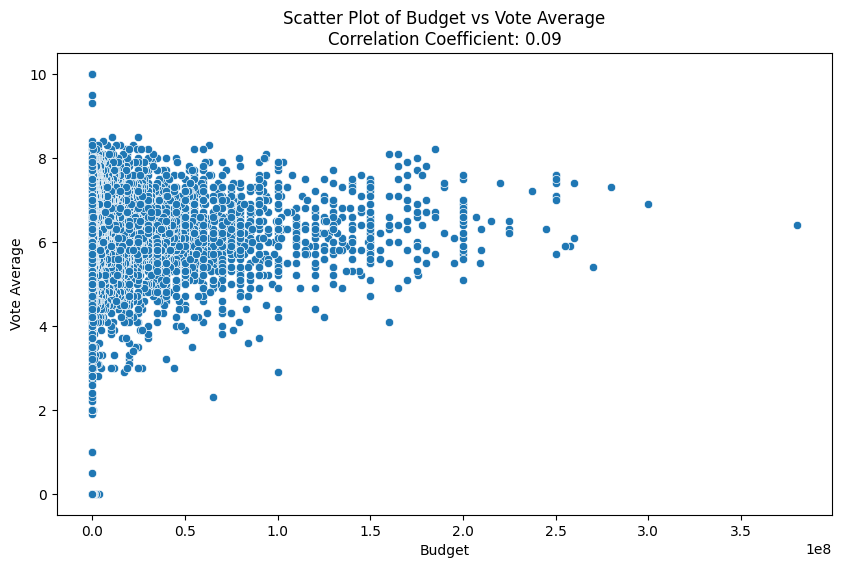

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Calculating the correlation coefficient between budget and vote_average
correlation = df[['budget', 'vote_average']].corr().iloc[0,1]

# Creating a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='vote_average')
plt.title(f'Scatter Plot of Budget vs Vote Average\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.show()


### Research Question 4 - Is there a relationship between the movie’s budget or revenue or profit?

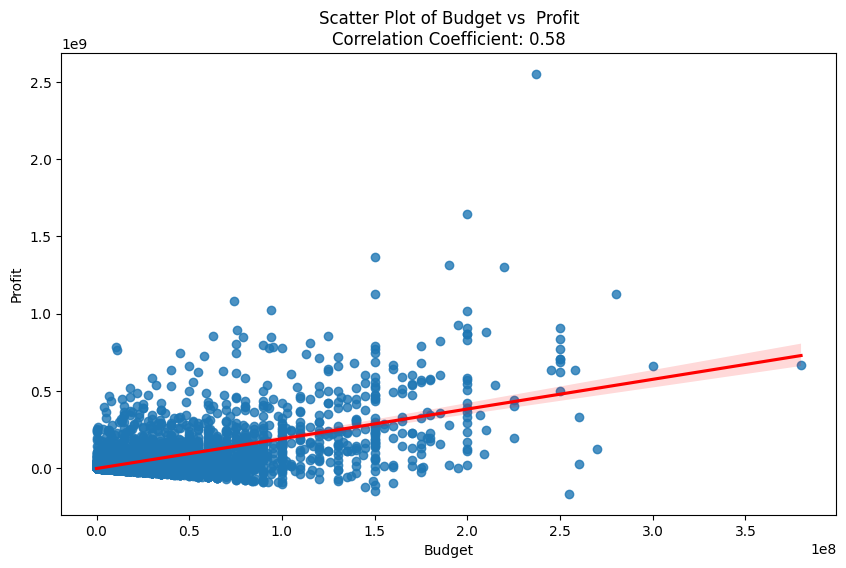

In [81]:
# Calculating the correlation coefficient between budget and profit
correlation = df[['budget', 'profit']].corr().iloc[0,1]

# Creating a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='budget', y='profit', line_kws={'color': 'red'})
plt.title(f'Scatter Plot of Budget vs  Profit\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

The above plot shows that there is a slight positive correlation between budget and profit, and it indicates that if the budget of the movie is high, the profit will also be high.

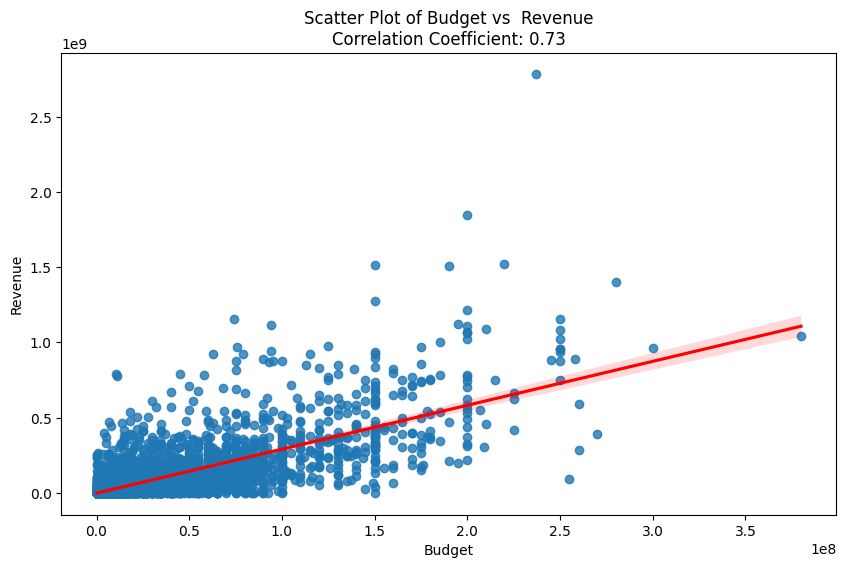

In [82]:
# Calculating the correlation coefficient between budget and Revenue
correlation = df[['budget', 'revenue']].corr().iloc[0,1]

# Creating a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='budget', y='revenue', line_kws={'color': 'red'})
plt.title(f'Scatter Plot of Budget vs  Revenue\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

The above plot shows that there is a positive correlation between budget and revenue, and it indicates that if the budget of the movie is high, the revenue will also be high.

<a id='conclusions'></a>
## Conclusions

### Research Questions:

1. What can we say about the success of a movie before it is released?
    If the movie is being directed by Steven Spielberg, Peter Jackson, James Cameron, Michael Bay and Christopher Nolan then the movie could be potentially a success. This is highly due to the fact that these directors have directed movies which have had the most positive ratings and the most profits.
    So, if a film is being directed by any one of these director's it will surely be a successful movie.

    Secondly, if the genre of the film is Adventure, Comedy, Science Fiction, Thriller or Action, it is much more likely to be a hit. 
    So, we can deduce that if a movie belongs to any of these genres, it could be a success.


2. Does budget influence movie's potential earnings?
    Interpreting the results, it is quite clear that budget does have an impact on the potential earnings of a movie. These results indicate that, on average, movies with higher budgets tend to generate more revenue. Furthermore, it also suggests that budget alone does not play a vital role in the earnings of the movie.
    

3. Is there a relationship between the movie’s budget and its critical reception?
    As the budget of a movie increases, there is a slightly positive, but not strong, tendency for the critical reception to be higher. However, the relationship is so weak that it's not a reliable or significant predictor. While there might be a slight trend where higher budgets correlate with slightly better vote averages, the strength of this relationship is so weak that budget should not be relied upon as a key factor in determining critical reception.
    

4. Is there a relationship between the movie’s budget or revenue or profit?
    With a higher budget, it appears that movies tend to generate higher revenue, but this does not necessarily translate to profit, as profit also depends on the budget being recouped and surpassed. The trend line indicates that, despite the strong correlation, there is significant variability in revenue, especially at higher budgets, indicating that other factors also play a significant role in a movie's financial success. There are movies with high budgets that do not show a corresponding high profit, and there are also movies with moderate budgets showing significant profit, highlighting the presence of other influencing factors.

In [84]:
!python -m nbconvert --to html movies_data_analysis.ipynb

[NbConvertApp] Converting notebook movies_data_analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1426303 bytes to movies_data_analysis.html
